In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split

class PhiThreshDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.phi_files = [f for f in os.listdir(data_dir) if f.startswith('Phi_mat_') and f.endswith('.txt')]
        self.v_thresh_files = [f for f in os.listdir(data_dir) if f.startswith('v_thresh_') and f.endswith('.txt')]
        
        # Sort the files to ensure correspondence between input and target files
        self.phi_files.sort()
        self.v_thresh_files.sort()

    def __len__(self):
        return len(self.phi_files)

    def __getitem__(self, idx):
        # Load the input vector (phi)
        phi_file = os.path.join(self.data_dir, self.phi_files[idx])
        phi = np.loadtxt(phi_file)

        # Load the output scalar (v_thresh)
        v_thresh_file = os.path.join(self.data_dir, self.v_thresh_files[idx])
        v_thresh = np.loadtxt(v_thresh_file)

        return torch.tensor(phi, dtype=torch.float32), torch.tensor(v_thresh, dtype=torch.float32)

In [2]:
def get_data_loaders(data_dir, batch_size=32, test_size=0.2):
    dataset = PhiThreshDataset(data_dir)
    train_indices, test_indices = train_test_split(list(range(len(dataset))), test_size=test_size, random_state=42)
    
    train_set = torch.utils.data.Subset(dataset, train_indices)
    test_set = torch.utils.data.Subset(dataset, test_indices)
    
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [3]:
class PhiNet(nn.Module):
    def __init__(self, input_size):
        super(PhiNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Single output for v_thresh
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")
        for i, (inputs, targets) in progress_bar:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            total_loss += loss.item()
    print(f'Test Loss: {total_loss / len(test_loader):.4f}')

In [5]:
data_dir = 'C:\\Users\\avp\\OneDrive - HKUST Connect\\Desktop\\Deep T-Rex\\Code\\RCode\\data'
input_size = len(np.loadtxt(os.path.join(data_dir, 'Phi_mat_1.txt')))

hparams = {"batch_size": 16,
           "learning_rate": 0.0001,
           "num_epochs": 40}

train_loader, test_loader = get_data_loaders(data_dir, batch_size=hparams["batch_size"])

model = PhiNet(input_size=input_size)
criterion = nn.MSELoss()  # Mean squared error loss for regression
optimizer = optim.Adam(model.parameters(), lr=hparams["learning_rate"])

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=hparams["num_epochs"])

# Evaluate the model
evaluate_model(model, test_loader, criterion)

Epoch 1/40: 100%|██████████| 500/500 [00:02<00:00, 240.71it/s]


Epoch [1/40], Loss: 0.1783


Epoch 2/40: 100%|██████████| 500/500 [00:02<00:00, 244.20it/s]


Epoch [2/40], Loss: 0.0238


Epoch 3/40: 100%|██████████| 500/500 [00:02<00:00, 247.94it/s]


Epoch [3/40], Loss: 0.0218


Epoch 4/40: 100%|██████████| 500/500 [00:02<00:00, 248.21it/s]


Epoch [4/40], Loss: 0.0206


Epoch 5/40: 100%|██████████| 500/500 [00:02<00:00, 243.38it/s]


Epoch [5/40], Loss: 0.0196


Epoch 6/40: 100%|██████████| 500/500 [00:02<00:00, 244.47it/s]


Epoch [6/40], Loss: 0.0186


Epoch 7/40: 100%|██████████| 500/500 [00:02<00:00, 242.76it/s]


Epoch [7/40], Loss: 0.0178


Epoch 8/40: 100%|██████████| 500/500 [00:02<00:00, 245.22it/s]


Epoch [8/40], Loss: 0.0170


Epoch 9/40: 100%|██████████| 500/500 [00:02<00:00, 246.24it/s]


Epoch [9/40], Loss: 0.0165


Epoch 10/40: 100%|██████████| 500/500 [00:02<00:00, 246.61it/s]


Epoch [10/40], Loss: 0.0160


Epoch 11/40: 100%|██████████| 500/500 [00:02<00:00, 246.21it/s]


Epoch [11/40], Loss: 0.0157


Epoch 12/40: 100%|██████████| 500/500 [00:02<00:00, 244.12it/s]


Epoch [12/40], Loss: 0.0154


Epoch 13/40: 100%|██████████| 500/500 [00:02<00:00, 246.95it/s]


Epoch [13/40], Loss: 0.0151


Epoch 14/40: 100%|██████████| 500/500 [00:02<00:00, 246.43it/s]


Epoch [14/40], Loss: 0.0149


Epoch 15/40: 100%|██████████| 500/500 [00:02<00:00, 246.13it/s]


Epoch [15/40], Loss: 0.0147


Epoch 16/40: 100%|██████████| 500/500 [00:02<00:00, 237.48it/s]


Epoch [16/40], Loss: 0.0145


Epoch 17/40: 100%|██████████| 500/500 [00:02<00:00, 234.06it/s]


Epoch [17/40], Loss: 0.0143


Epoch 18/40: 100%|██████████| 500/500 [00:02<00:00, 235.29it/s]


Epoch [18/40], Loss: 0.0142


Epoch 19/40: 100%|██████████| 500/500 [00:02<00:00, 236.46it/s]


Epoch [19/40], Loss: 0.0140


Epoch 20/40: 100%|██████████| 500/500 [00:02<00:00, 231.07it/s]


Epoch [20/40], Loss: 0.0138


Epoch 21/40: 100%|██████████| 500/500 [00:02<00:00, 236.11it/s]


Epoch [21/40], Loss: 0.0136


Epoch 22/40: 100%|██████████| 500/500 [00:02<00:00, 242.88it/s]


Epoch [22/40], Loss: 0.0134


Epoch 23/40: 100%|██████████| 500/500 [00:02<00:00, 240.55it/s]


Epoch [23/40], Loss: 0.0132


Epoch 24/40: 100%|██████████| 500/500 [00:02<00:00, 237.93it/s]


Epoch [24/40], Loss: 0.0130


Epoch 25/40: 100%|██████████| 500/500 [00:02<00:00, 238.00it/s]


Epoch [25/40], Loss: 0.0128


Epoch 26/40: 100%|██████████| 500/500 [00:02<00:00, 237.71it/s]


Epoch [26/40], Loss: 0.0126


Epoch 27/40: 100%|██████████| 500/500 [00:02<00:00, 239.00it/s]


Epoch [27/40], Loss: 0.0124


Epoch 28/40: 100%|██████████| 500/500 [00:02<00:00, 237.41it/s]


Epoch [28/40], Loss: 0.0122


Epoch 29/40: 100%|██████████| 500/500 [00:02<00:00, 230.72it/s]


Epoch [29/40], Loss: 0.0120


Epoch 30/40: 100%|██████████| 500/500 [00:02<00:00, 221.10it/s]


Epoch [30/40], Loss: 0.0119


Epoch 31/40: 100%|██████████| 500/500 [00:03<00:00, 127.33it/s]


Epoch [31/40], Loss: 0.0116


Epoch 32/40: 100%|██████████| 500/500 [00:04<00:00, 116.29it/s]


Epoch [32/40], Loss: 0.0115


Epoch 33/40: 100%|██████████| 500/500 [00:04<00:00, 116.81it/s]


Epoch [33/40], Loss: 0.0113


Epoch 34/40: 100%|██████████| 500/500 [00:04<00:00, 117.06it/s]


Epoch [34/40], Loss: 0.0112


Epoch 35/40: 100%|██████████| 500/500 [00:04<00:00, 110.69it/s]


Epoch [35/40], Loss: 0.0110


Epoch 36/40: 100%|██████████| 500/500 [00:04<00:00, 117.16it/s]


Epoch [36/40], Loss: 0.0108


Epoch 37/40: 100%|██████████| 500/500 [00:04<00:00, 114.95it/s]


Epoch [37/40], Loss: 0.0107


Epoch 38/40: 100%|██████████| 500/500 [00:05<00:00, 95.23it/s] 


Epoch [38/40], Loss: 0.0105


Epoch 39/40: 100%|██████████| 500/500 [00:05<00:00, 87.38it/s] 


Epoch [39/40], Loss: 0.0104


Epoch 40/40: 100%|██████████| 500/500 [00:06<00:00, 83.26it/s] 


Epoch [40/40], Loss: 0.0103
Test Loss: 0.0173


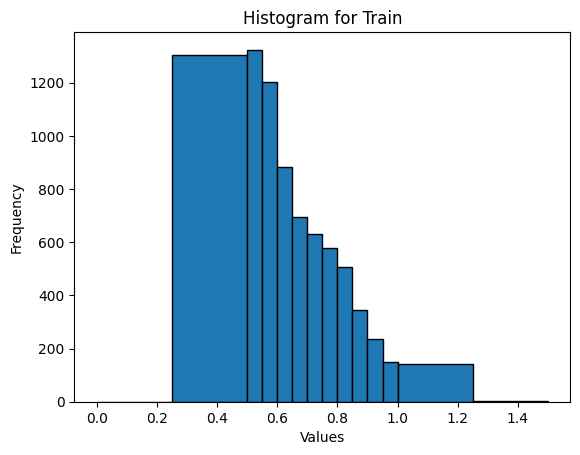

In [11]:
model.eval()

with torch.no_grad():
    total = []
    for inputs, targets in train_loader:
        total += model(inputs).numpy().squeeze().tolist()

bin_edges = [0, 0.25 , 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.25, 1.5]

# Create a histogram with fixed bin edges
plt.hist(total, bins=bin_edges, edgecolor='black')

# Add title and labels
plt.title('Histogram for Train')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

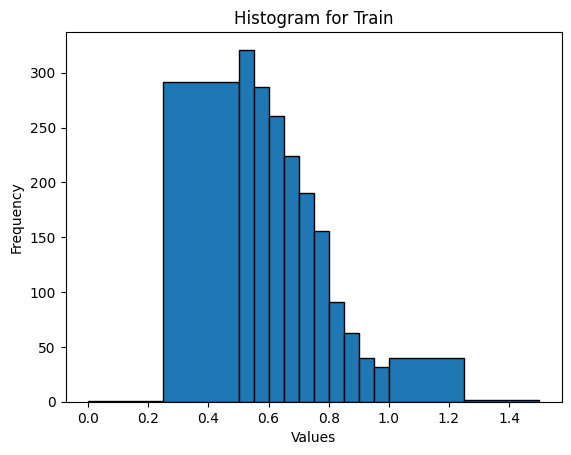

In [12]:
model.eval()

with torch.no_grad():
    total = []
    for inputs, targets in test_loader:
        total += model(inputs).numpy().squeeze().tolist()

bin_edges = [0, 0.25 , 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.25, 1.5]

# Create a histogram with fixed bin edges
plt.hist(total, bins=bin_edges, edgecolor='black')

# Add title and labels
plt.title('Histogram for Train')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()